# Import Package and Read Data

In [2]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the dataset, which is in the "../input/" directory
dior = pd.read_excel("DIOR stock prices.xlsx")
dior.head()


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Unnamed: 8,Unnamed: 9
0,1999-12-31,CDI.PA,32.674278,61.500000,61.500000,61.500000,61.500000,0,NaN,NaN
1,2000-01-03,CDI.PA,32.844299,61.820000,63.950001,61.750000,62.200001,424416,NaN,historical daily stock prices from 2000-2022
2,2000-01-04,CDI.PA,29.688440,55.880001,62.619999,55.680000,62.619999,1132848,NaN,CDI.PA = Christian Dior
3,2000-01-05,CDI.PA,27.892687,52.500000,54.750000,52.150002,54.619999,962416,NaN,NaN
4,2000-01-06,CDI.PA,27.016062,50.849998,53.020000,50.849998,53.020000,813360,NaN,NaN


In [3]:
dior.tail()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Unnamed: 8,Unnamed: 9
5724,2022-05-13,CDI.PA,551.0,551.0,551.0,535.5,543.0,7470,NaN,NaN
5725,2022-05-16,CDI.PA,547.5,547.5,554.0,544.0,546.0,3651,NaN,NaN
5726,2022-05-17,CDI.PA,560.5,560.5,569.5,552.0,552.5,5103,NaN,NaN
5727,2022-05-18,CDI.PA,551.5,551.5,565.5,551.5,562.5,11496,NaN,NaN
5728,2022-05-19,CDI.PA,543.0,543.0,543.5,541.5,542.5,99,NaN,NaN


In [4]:
# Stats
dior.describe()

,Adj Close,Close,High,Low,Open,Volume,Unnamed: 8
count,5729.000000,5729.000000,5729.000000,5729.000000,5729.000000,5.729000e+03,0.0
mean,143.768438,167.303385,169.115925,165.430764,167.275775,1.482140e+05,NaN
std,161.539471,162.029115,163.796465,160.251314,161.956998,1.837089e+05,NaN
min,11.350244,21.100000,23.600000,20.500000,22.000000,0.000000e+00,NaN
25%,34.834209,59.299999,60.500000,58.200001,59.220001,4.849300e+04,NaN
50%,75.248840,98.589996,100.400002,97.160004,98.290001,1.068450e+05,NaN
75%,153.662476,183.649994,185.350006,182.100006,183.800003,1.837460e+05,NaN
max,746.498291,755.500000,755.500000,739.500000,746.500000,3.144592e+06,NaN


In [5]:
df=dior.copy()

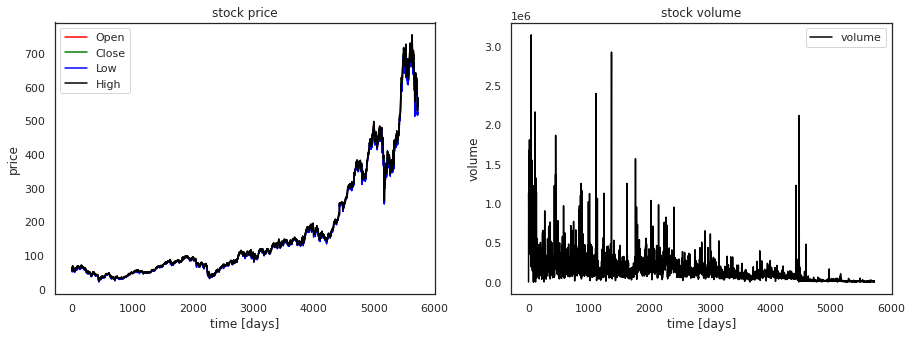

In [6]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.Symbol == 'CDI.PA'].Open.values, color='red', label='Open')
plt.plot(df[df.Symbol == 'CDI.PA'].Close.values, color='green', label='Close')
plt.plot(df[df.Symbol == 'CDI.PA'].Low.values, color='blue', label='Low')
plt.plot(df[df.Symbol == 'CDI.PA'].High.values, color='black', label='High')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.Symbol == 'CDI.PA'].Volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

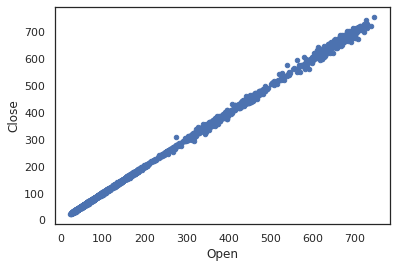

In [7]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the dior stock features.
dior.plot(kind="scatter", x="Open", y="Close")

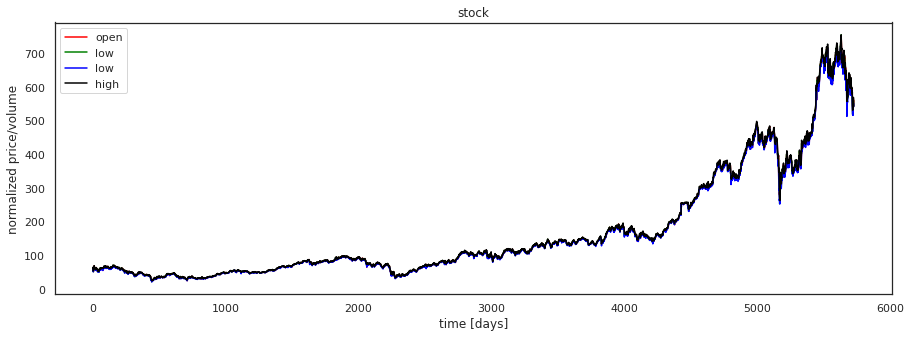

In [8]:
plt.figure(figsize=(15, 5));
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='low')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

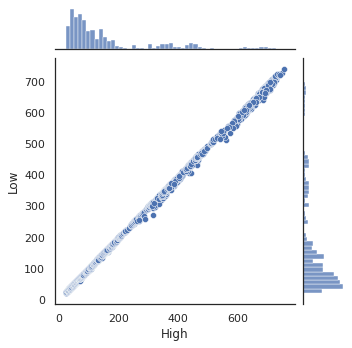

In [9]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="High", y="Low", data=dior, size=5)

In [10]:
dior.corr()

,Adj Close,Close,High,Low,Open,Volume,Unnamed: 8
Adj Close,1.000000,0.998496,0.998560,0.998230,0.998277,-0.417793,NaN
Close,0.998496,1.000000,0.999878,0.999889,0.999759,-0.422894,NaN
High,0.998560,0.999878,1.000000,0.999839,0.999877,-0.421753,NaN
Low,0.998230,0.999889,0.999839,1.000000,0.999885,-0.424065,NaN
Open,0.998277,0.999759,0.999877,0.999885,1.000000,-0.422850,NaN
Volume,-0.417793,-0.422894,-0.421753,-0.424065,-0.422850,1.000000,NaN
Unnamed: 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


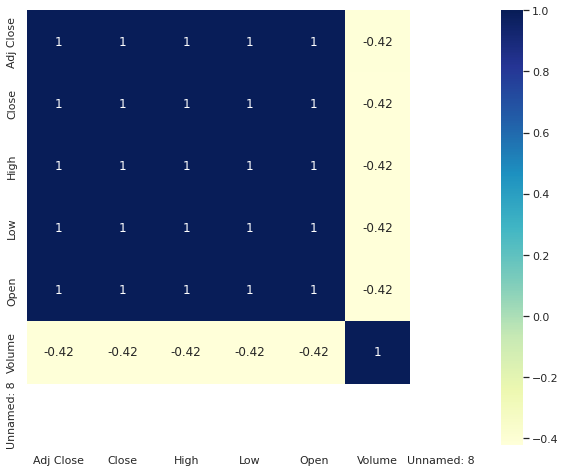

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dior.corr(),cmap="YlGnBu", annot=True)
plt.show()

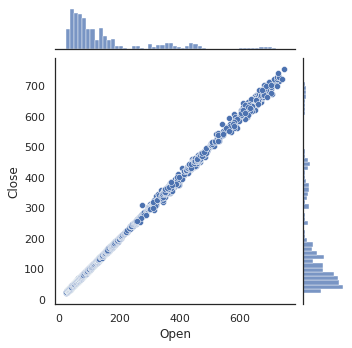

In [12]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="Open", y="Close", data=dior, size=5)

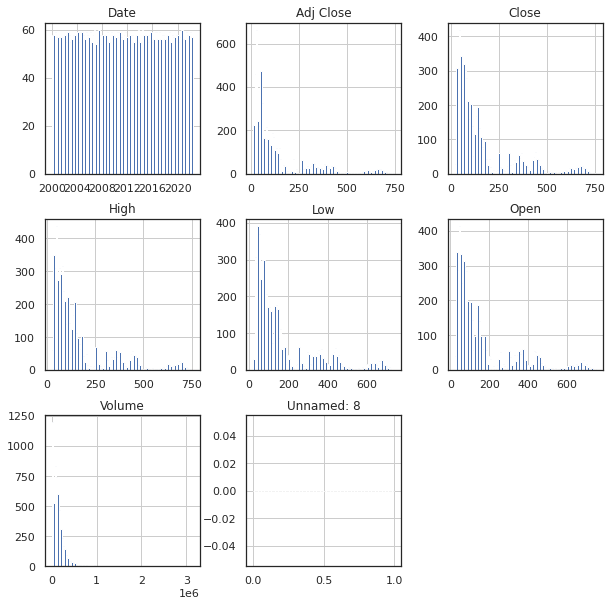

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
df.hist(bins=100, ax=ax1)
ax1.set_ylabel('Open')
ax1.set_xlabel('Close')

plt.show()

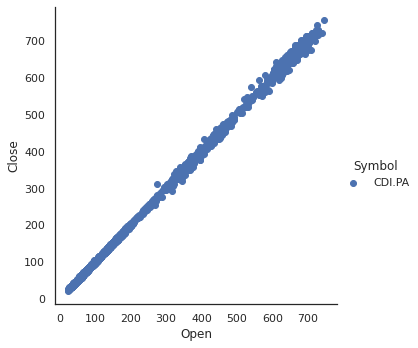

In [14]:

# We'll use seaborn's FacetGrid to color the scatterplot by Symbol
sns.FacetGrid(dior, hue="Symbol", size=5) \
   .map(plt.scatter, "Open", "Close") \
   .add_legend()

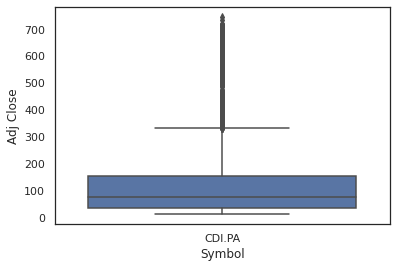

In [15]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Symbol", y="Adj Close", data=dior)

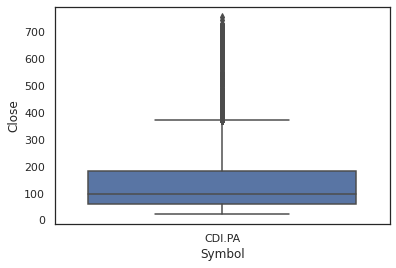

In [16]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Symbol", y="Close", data=dior)

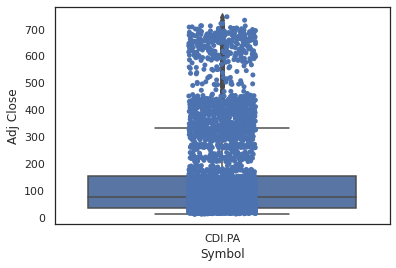

In [17]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Symbol", y="Adj Close", data=dior)
ax = sns.stripplot(x="Symbol", y="Adj Close", data=dior, jitter=True, edgecolor="gray")

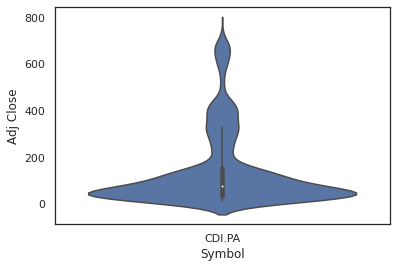

In [18]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Symbol", y="Adj Close", data=dior, size=6)

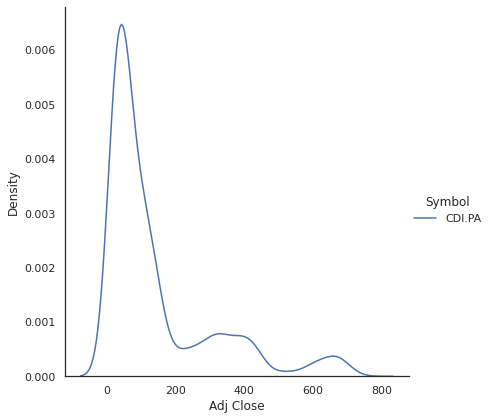

In [19]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(dior, hue="Symbol", size=6) \
   .map(sns.kdeplot, "Adj Close") \
   .add_legend()

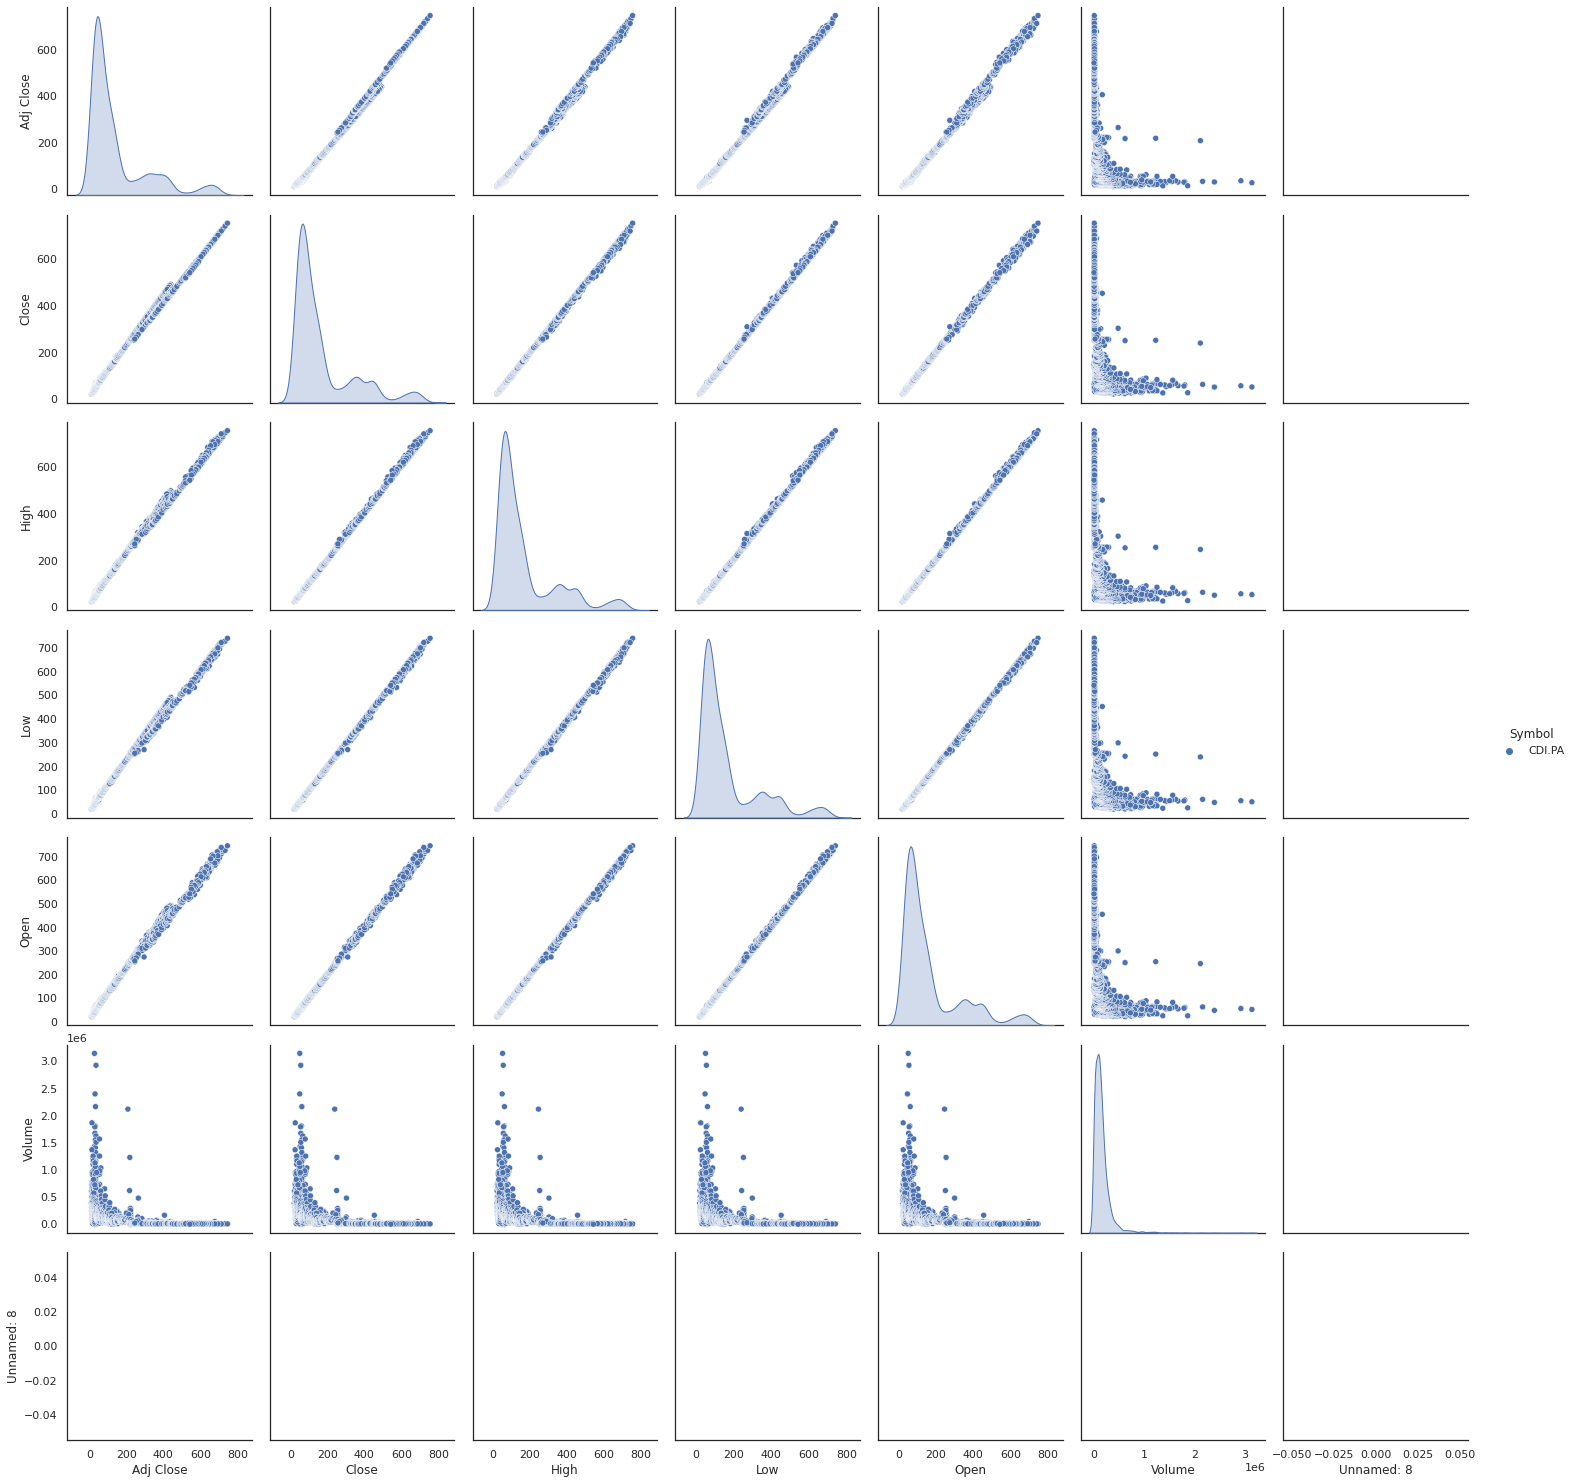

In [20]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features

sns.pairplot(dior.drop("Date", axis=1), hue="Symbol", size=3)

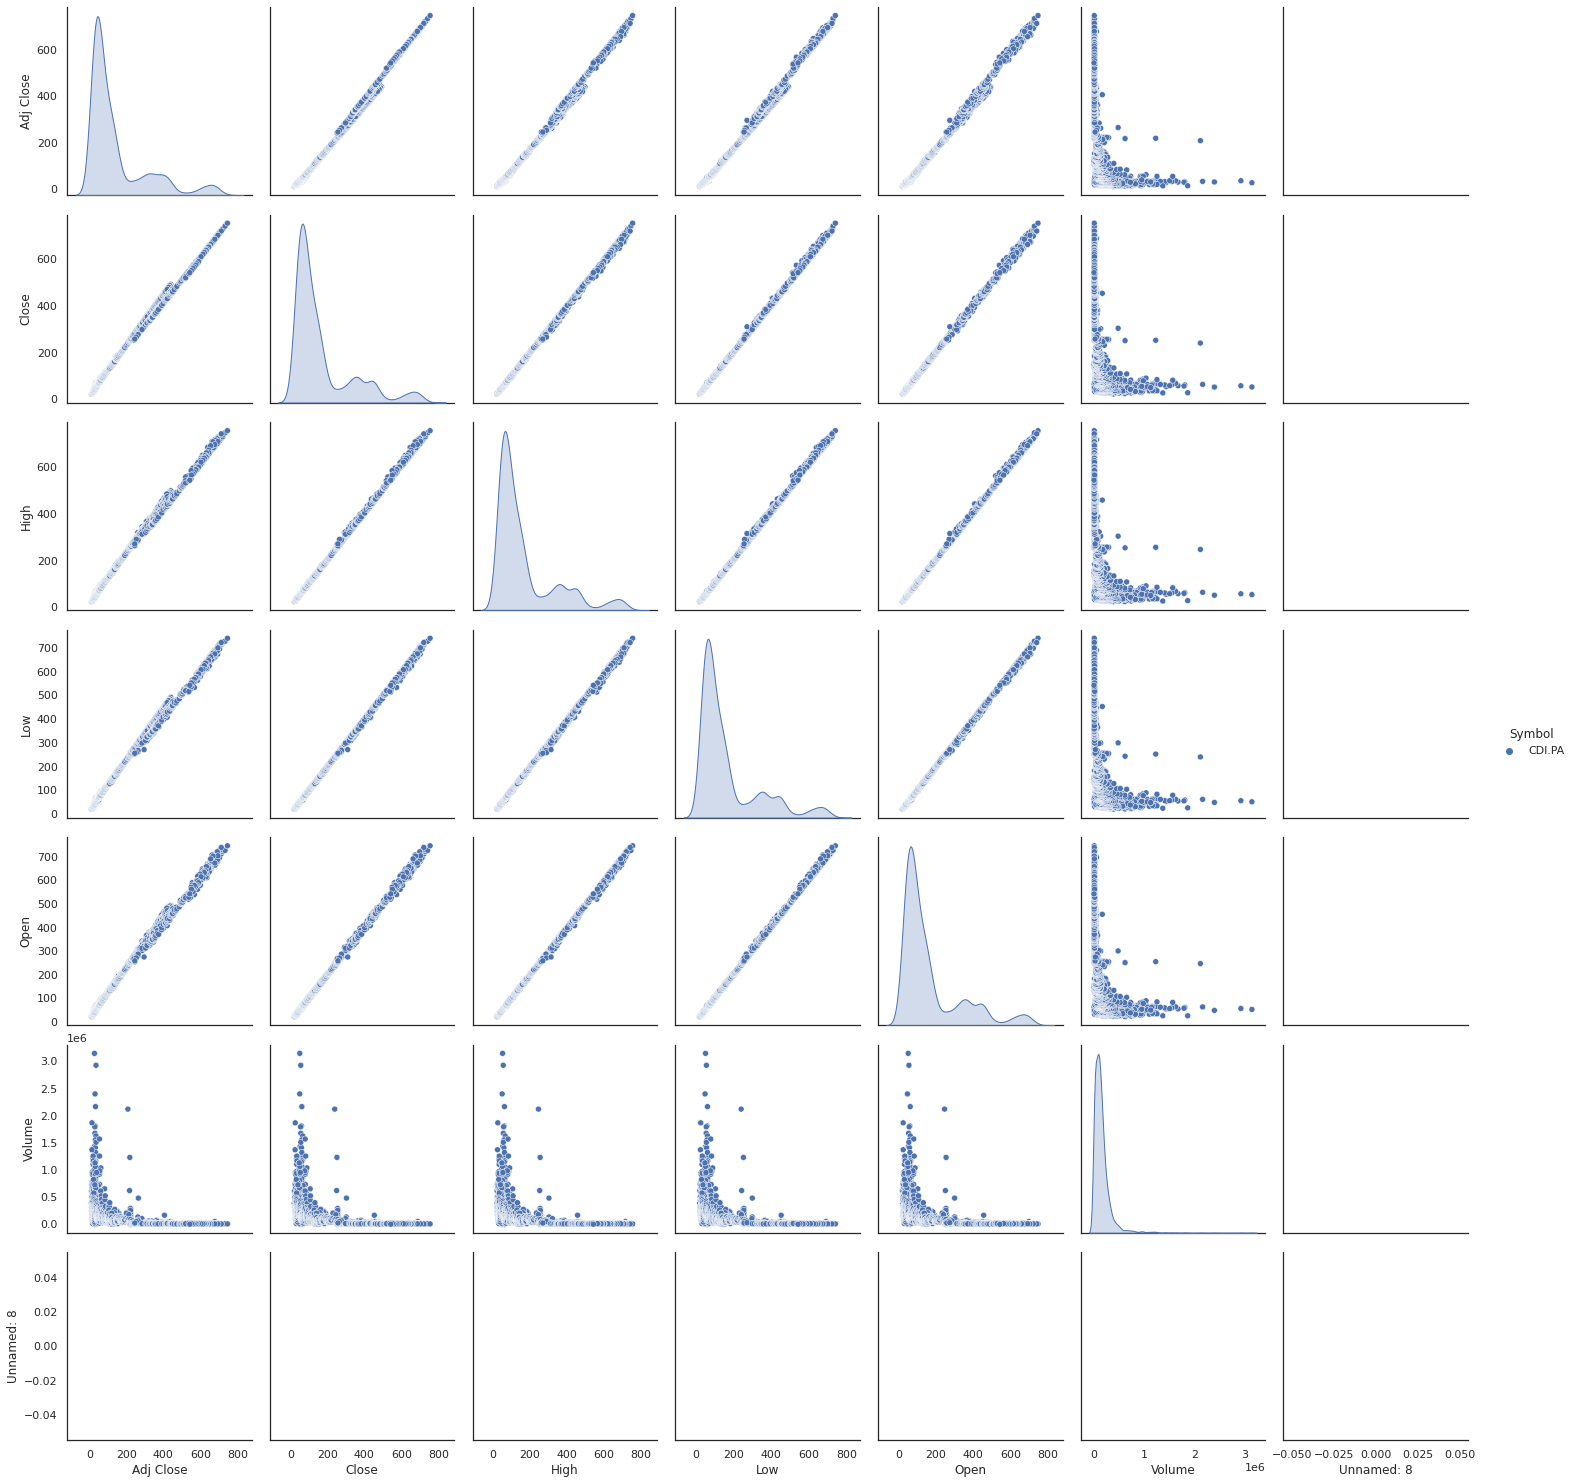

In [21]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(dior.drop("Date", axis=1), hue="Symbol", size=3, diag_kind="kde")

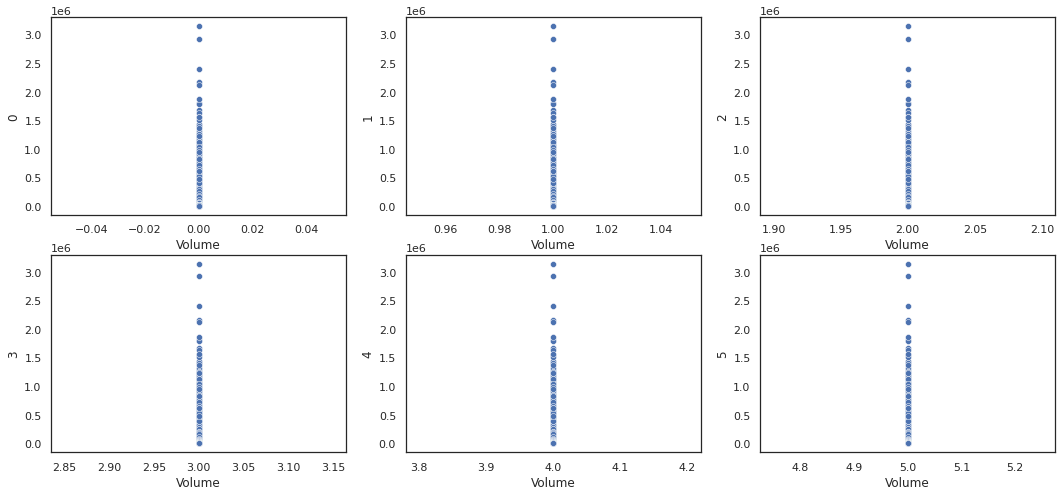

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

axs = axs.flatten()
for i, col in enumerate(list(dior.index[:6])):
    sns.scatterplot(y='Volume', x=col, ax=axs[i], data=dior)
    axs[i].set_xlabel('Volume')
    axs[i].set_ylabel(col)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d845b32d0>,
      dtype=object)

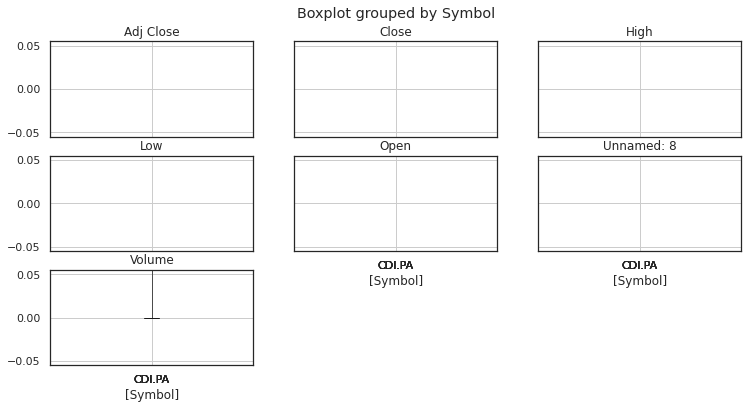

In [23]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by Symbol
dior.drop("Date", axis=1).boxplot(by="Symbol", figsize=(12, 6))